In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import tensorflow as tf
# import keras

In [5]:
emission = pd.read_csv('Datathon Data/Energy Data - Emissions.csv')

<Axes: xlabel='Energy Type'>

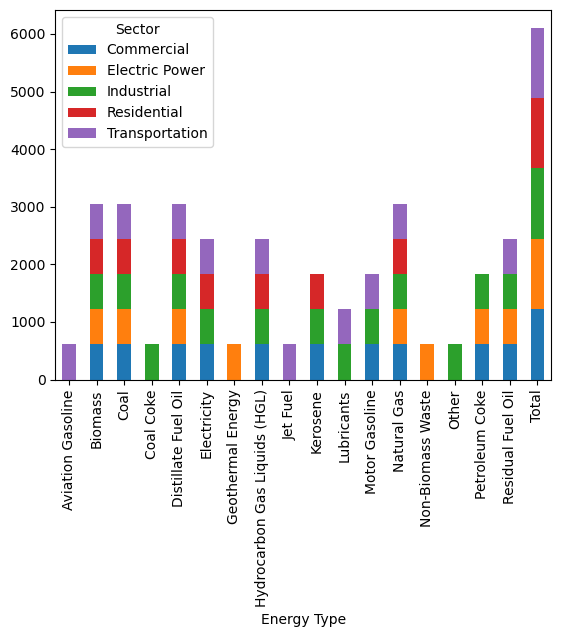

In [6]:
emission.groupby(['Energy Type', 'Sector']).size().unstack().plot(kind='bar', stacked=True)

In [9]:
emission.head()

,MSN,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Class,Sector
0,CKTCEUS,197301,1/1/1973,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
1,CKTCEUS,197302,2/1/1973,98.833,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
2,CKTCEUS,197303,3/1/1973,98.483,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
3,CKTCEUS,197304,4/1/1973,94.15,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
4,CKTCEUS,197305,5/1/1973,95.424,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN


/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_54324/126461280.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coal_emissions = coal_emissions.groupby('Date').sum().reset_index()


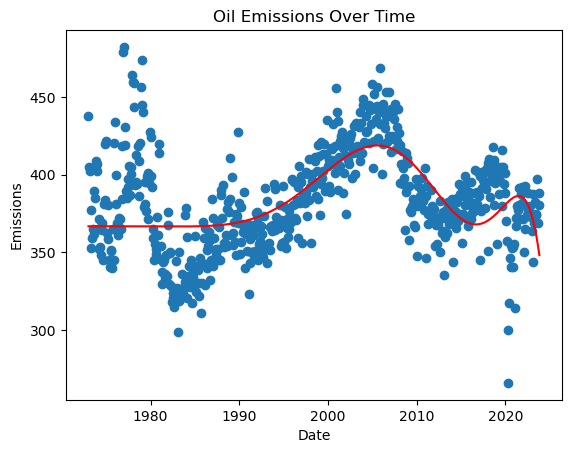

In [32]:

# pplot coal emissions over time
coal_emissions = emission[emission['Energy Class'] == 'Petroleum']
coal_emissions = coal_emissions[coal_emissions.isna().any(axis=1)]
coal_emissions['Value'] = pd.to_numeric(coal_emissions['Value'], errors='coerce')

# sum the emissions for each date
coal_emissions = coal_emissions.groupby('Date').sum().reset_index()

import datetime
coal_emissions['Date'] = pd.to_datetime(coal_emissions['Date'])
coal_emissions = coal_emissions.sort_values('Date')

# plot coal emissions over time

plt.scatter(coal_emissions['Date'], coal_emissions['Value'])
plt.xlabel('Date')
plt.ylabel('Emissions')
plt.title('Oil Emissions Over Time')

# fit a polynomial to the data
plt.plot(coal_emissions['Date'], y_pred, color='red')
plt.show()

In [37]:
X = coal_emissions['Date'].values.reshape(-1, 1)
X = X - X[0]
X = X/X[1]
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, coal_emissions['Value'])
y_pred = model.predict(X_poly)

LinearRegression()

In [28]:
consumption = pd.read_csv('Datathon Data/Energy Data - Consumption.csv')

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_52375/925827292.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coal_emissions = coal_emissions.groupby('Date').sum().reset_index()


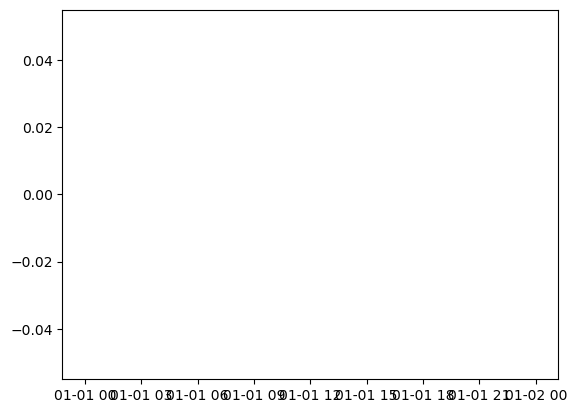

In [44]:
# pplot coal emissions over time
consumption = consumption[consumption['Sector'].isna()]
coal_emissions = consumption[consumption['Energy Class'] == 'Petroleum']
coal_emissions['Value'] = pd.to_numeric(coal_emissions['Value'], errors='coerce')

# sum the emissions for each date
coal_emissions = coal_emissions.groupby('Date').sum().reset_index()

import datetime
coal_emissions['Date'] = pd.to_datetime(coal_emissions['Date'])
coal_emissions = coal_emissions.sort_values('Date')

# plot coal emissions over time

plt.scatter(coal_emissions['Date'], coal_emissions['Value'])

In [46]:
consumption = consumption[consumption['Sector'].isna()]
coal_emissions.head()
coal_emissions = consumption[consumption['Energy Class'] == 'Petroleum']
coal_emissions['Value'] = pd.to_numeric(coal_emissions['Value'], errors='coerce')

# sum the emissions for each date
coal_emissions = coal_emissions.groupby('Date').sum().reset_index()
coal_emissions.head()

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_52375/2680586186.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coal_emissions = coal_emissions.groupby('Date').sum().reset_index()


,Date,YYYYMM,Value,Column_Order


In [49]:
coal_emissions = consumption[consumption['Energy Class'] == 'Petroleum']

In [52]:
transportation = pd.read_csv('Datathon Data/monthly_transportation_statistics.csv')

In [55]:
transportation.isna().sum()

Date                                                           0
Month                                                          0
Year                                                           0
Air Safety - General Aviation Fatalities                       1
Highway Fatalities Per 100 Million Vehicle Miles Traveled    226
                                                            ... 
U.S. Airline Traffic - Domestic - Non Seasonally Adjusted    221
Transborder - Total North American Freight                    85
Transborder - U.S. - Mexico Freight                           85
U.S. marketing air carriers on-time performance (percent)    219
Transborder - U.S. - Canada Freight                           85
Length: 137, dtype: int64